In [1]:
%matplotlib notebook

import matplotlib as mpl
import DataSetQuery
import datetime
import pandas as pd
import MalardHelpers
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

In [2]:
#dfStats = gp.read_file("regression_results/ols_run_tdx2.gpkg")
dfStats = gp.read_file("regression_results/himalayas.gpkg")
rivers = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/rivers_reprojected.shp")
countries = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/countries.shp")
#coastline = gp.read_file('/data/puma1/scratch/mtngla/background-shapefiles/alaska/coastline.shp')


In [3]:
minCount=50
pd.options.display.max_columns = None
display(dfStats)


gridCell.minX  gridCell.minY  gridCell.size  statistics.DebrisMaskArea  \
0         -1600000        -100000         100000                   0.863542   
1         -1500000              0         100000                   0.216172   
2         -1500000         400000         100000                  10.772159   
3         -1400000              0         100000                  23.879357   
4         -1400000         100000         100000                   2.365825   
5         -1400000         400000         100000                  11.852868   
6         -1300000              0         100000                  98.882699   
7         -1300000         100000         100000                  64.220236   
8         -1300000         200000         100000                   3.279436   
9         -1300000         300000         100000                   6.274773   
10        -1300000         400000         100000                 113.223700   
11        -1300000         500000         100000                  14.126533   
12        -1200000        -100000         100000                   1.833003   
13        -1200000              0         100000                  60.920130   
14        -1200000         100000         100000                 218.142458   
15        -1200000         200000         100000                  56.625737   
16        -1200000         300000         100000                 180.843137   
17        -1200000         400000         100000                 179.579782   
18        -1200000         500000         100000                  13.178850   
19        -1200000         700000         100000                  13.205223   
20        -1100000        -100000         100000                  28.294073   
21        -1100000              0         100000                  54.784879   
22        -1100000         100000         100000                 188.677573   
23        -1100000         200000         100000                  61.457901   
24        -1100000         300000         100000                 185.559217   
25        -1100000         400000         100000                 193.507904   
26        -1100000         500000         100000                   4.811207   
27        -1100000         700000         100000                   8.570041   
28        -1000000        -300000         100000                   1.596717   
29        -1000000        -200000         100000                   0.488186   
..             ...            ...            ...                        ...   
229        1000000        -400000         100000                   0.331275   
230        1000000              0         100000                   0.400401   
231        1000000         200000         100000                   0.285396   
232        1000000         300000         100000                   5.798763   
233        1000000         400000         100000                   1.599557   
234        1100000        -900000         100000                   4.528705   
235        1100000        -800000         100000                 102.585041   
236        1100000        -700000         100000                 151.075038   
237        1100000        -600000         100000                   5.288791   
238        1100000        -400000         100000                   0.529913   
239        1100000              0         100000                   0.113448   
240        1100000         300000         100000                   2.419051   
241        1200000        -900000         100000                   5.631345   
242        1200000        -800000         100000                  43.670010   
243        1200000        -700000         100000                   5.387120   
244        1200000        -400000         100000                   1.876232   
245        1200000        -100000         100000                   1.288169   
246        1200000              0         100000                   0.111686   
247        1300000        -800000         100000       

In [4]:
dfStats.columns

Index(['gridCell.minX', 'gridCell.minY', 'gridCell.size',
       'statistics.DebrisMaskArea', 'statistics.GlacierMaskArea',
       'statistics.afterGlacierMask', 'statistics.meanElevationDifference',
       'statistics.pointsOnDataSetValue1',
       'statistics.pointsOnDataSetValue1Ratio',
       'statistics.pointsOnDataSetValue2',
       'statistics.pointsOnDataSetValue2Ratio',
       'statistics.pointsWithinDebrisMask', 'statistics.result_avgX',
       'statistics.result_avgY', 'statistics.result_count_2010',
       'statistics.result_count_2011', 'statistics.result_count_2012',
       'statistics.result_count_2013', 'statistics.result_count_2014',
       'statistics.result_count_2015', 'statistics.result_count_2016',
       'statistics.result_count_2017', 'statistics.result_count_2018',
       'statistics.result_count_2019', 'statistics.result_offsetX',
       'statistics.result_offsetY', 'statistics.result_refDifference_2010',
       'statistics.result_refDifference_2011',
       '

In [22]:
dfStats.shape[0]

104

In [5]:
pd.options.display.float_format = '{:20,.6f}'.format
dfStats.mean()

gridCell.minX                                 -62,162.162162
gridCell.minY                                -229,343.629344
gridCell.size                                 100,000.000000
statistics.DebrisMaskArea                          37.350430
statistics.GlacierMaskArea                        346.088633
statistics.afterGlacierMask                    15,619.830116
statistics.meanElevationDifference                 -8.416708
statistics.pointsOnDataSetValue1                1,855.574359
statistics.pointsOnDataSetValue1Ratio              17.804092
statistics.pointsOnDataSetValue2               14,222.776062
statistics.pointsOnDataSetValue2Ratio              86.595375
statistics.pointsWithinDebrisMask                 531.733591
statistics.result_avgX                        -12,592.600651
statistics.result_avgY                       -177,483.888339
statistics.result_count_2010                      527.729730
statistics.result_count_2011                    1,725.027027
statistics.result_count_

In [6]:

dfStats.loc[(dfStats['statistics.GlacierMaskArea']<10.0), 'statistics.GlacierMaskArea.pointsize'] = 5
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=10.0) & (dfStats['statistics.GlacierMaskArea']<100.0), 'statistics.GlacierMaskArea.pointsize'] = 20
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=100.0) & (dfStats['statistics.GlacierMaskArea']<500.0), 'statistics.GlacierMaskArea.pointsize'] = 50
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=500.0) & (dfStats['statistics.GlacierMaskArea']<1000.0), 'statistics.GlacierMaskArea.pointsize'] = 80
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=1000.0) & (dfStats['statistics.GlacierMaskArea']<2000.0), 'statistics.GlacierMaskArea.pointsize'] = 125
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>2000.0), 'statistics.GlacierMaskArea.pointsize'] = 170

<IPython.core.display.Javascript object>


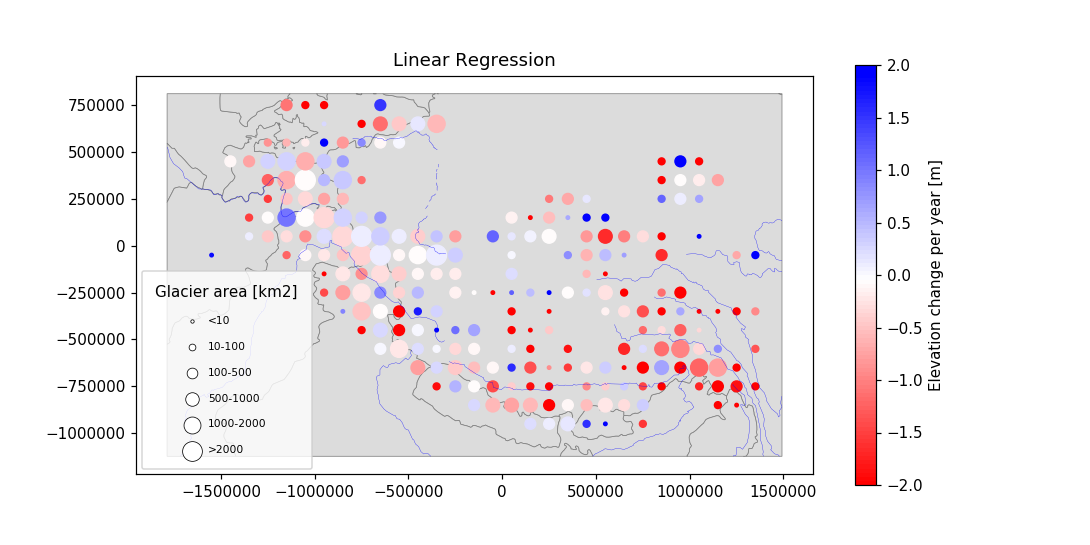

Text(0.5, 1.0, 'Linear Regression')

In [11]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count'] > minCount)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
#msf = 170
#markersize = (dfStatsfiltered['statistics.GlacierMaskArea'])*msf
markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

#labels = ["0.05", "0.10", "0.20", "0.30"]
#sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
#print(sizes)
labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')
    
plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.3,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)
plt.title('Linear Regression')

In [26]:
dfStatsfiltered.shape[0]

97

<IPython.core.display.Javascript object>


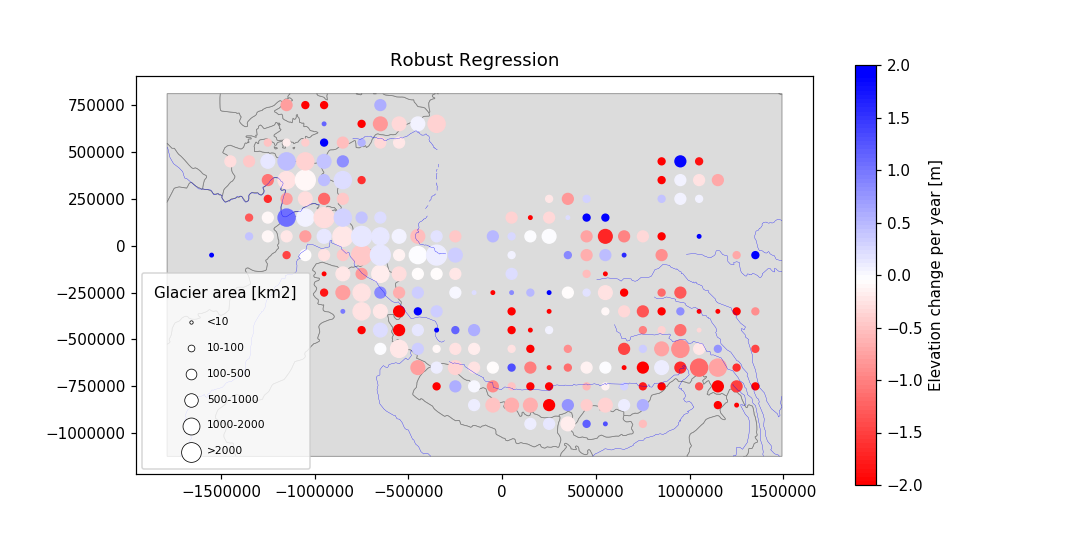

Text(0.5, 1.0, 'Robust Regression')

In [13]:
#ROBUST
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.robust.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)


markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStatsfiltered.plot(ax=ax, column='regression.robust.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)
plt.title('Robust Regression')

<IPython.core.display.Javascript object>


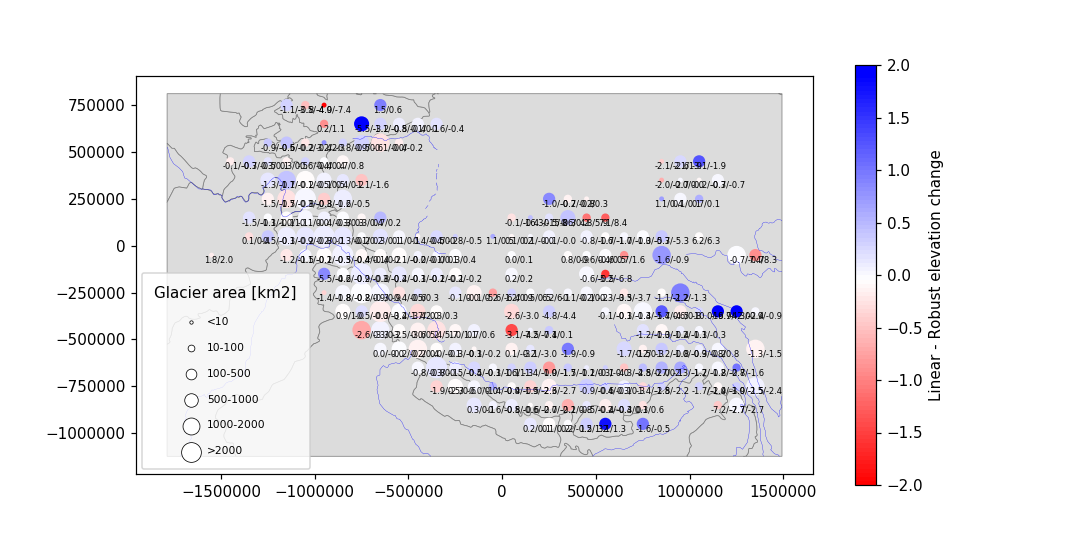

In [15]:
%matplotlib notebook
# DIFFERENCE between linear and robust

dfStats['regression.c.difference'] = abs(dfStats['regression.c.year'])-abs(dfStats['regression.robust.c.year'])
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

vmin=-2
vmax=2

markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStats.plot(ax=ax, column='regression.c.difference', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Linear - Robust elevation change')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.year']):
    en = "%.1f/%.1f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.year'], dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.robust.c.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


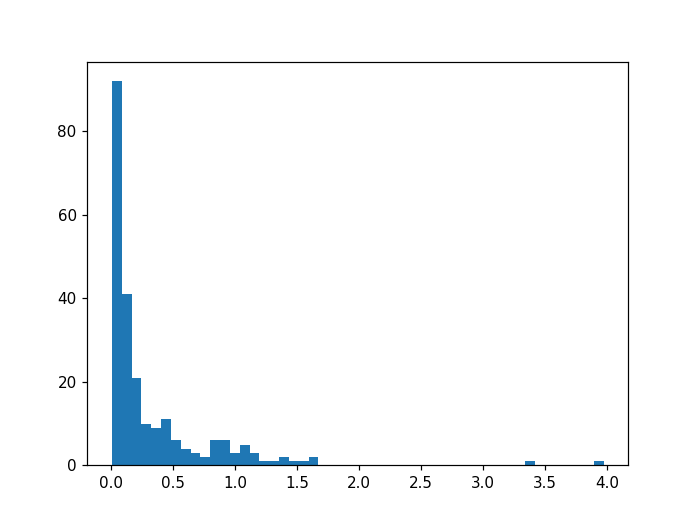

/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([92., 41., 21., 10.,  9., 11.,  6.,  4.,  3.,  2.,  6.,  6.,  3.,
         5.,  3.,  1.,  1.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00809875, 0.08739327, 0.16668778, 0.2459823 , 0.32527681,
        0.40457133, 0.48386584, 0.56316036, 0.64245487, 0.72174939,
        0.8010439 , 0.88033842, 0.95963293, 1.03892745, 1.11822196,
        1.19751648, 1.27681099, 1.35610551, 1.43540002, 1.51469454,
        1.59398905, 1.67328357, 1.75257808, 1.8318726 , 1.91116711,
        1.99046163, 2.06975614, 2.14905066, 2.22834517, 2.30763969,
        2.3869342 , 2.46622872, 2.54552323, 2.62481775, 2.70411226,
        2.78340678, 2.86270129, 2.94199581, 3.02129032, 3.10058484,
        3.17987936, 3.25917387, 3.33846839, 3.4177629 , 3.49705742,
        3.57635193, 3.65564645, 3.73494096, 3.81423548, 3.89352999,
        3.97282451]),
 <a list of 50

In [16]:
%matplotlib notebook
plt.hist(dfStats['regression.c.se.year'], bins=50)

<IPython.core.display.Javascript object>


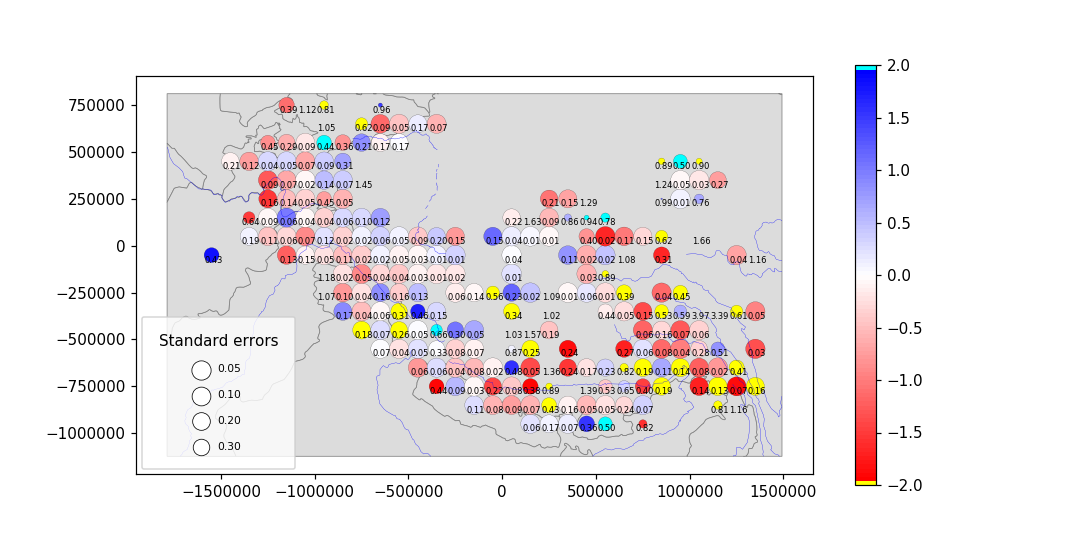

In [19]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',[(1, 1, 0)]+list(map(cm_,range(98)))+[(0, 1, 1)], N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
msf = 170
markersize = (1-dfStatsfiltered['regression.c.se.year'])*msf
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, legend=True, vmin=vmin, \
                     vmax=vmax, cmap=cm, edgecolor='black', linewidth=0.1)

labels = ["0.05", "0.10", "0.20", "0.30"]
sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.6,\
handletextpad=1, title='Standard errors', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.se.year']):
    en = "%.2f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.se.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


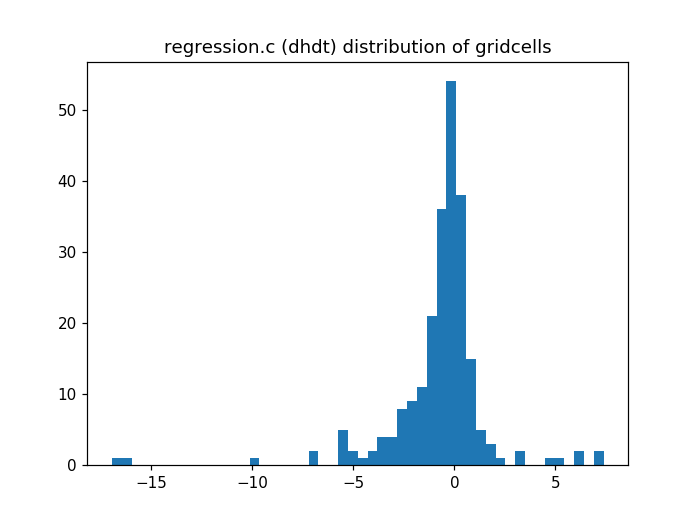

In [20]:
%matplotlib notebook
plt.hist(dfStatsfiltered['regression.c.year'], bins=50)
plt.title('regression.c (dhdt) distribution of gridcells')
plt.show()

<IPython.core.display.Javascript object>


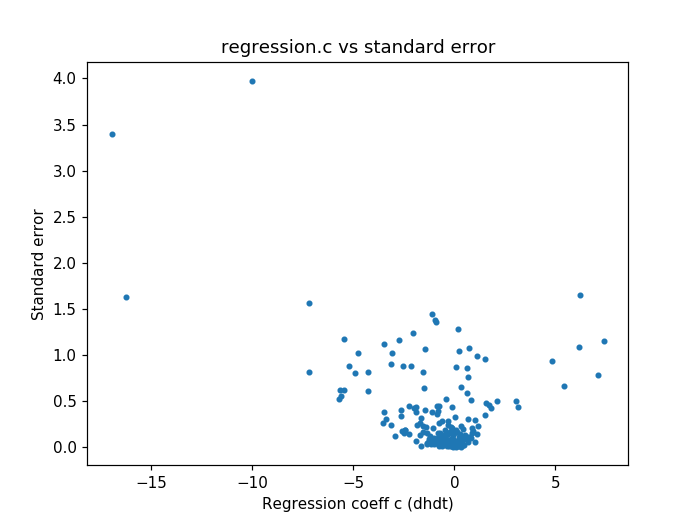

In [21]:
%matplotlib notebook
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.c.se.year'], marker='.')
plt.title('regression.c vs standard error')
plt.xlabel('Regression coeff c (dhdt)')
plt.ylabel('Standard error')
plt.show()

<IPython.core.display.Javascript object>


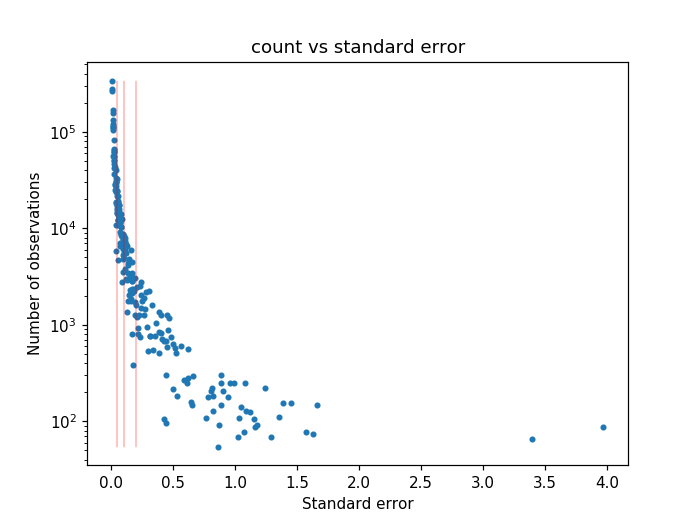

In [22]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.se.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
ymin=dfStatsfiltered['regression.count'].min()
plt.plot([0.05,0.05],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.1,0.1],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.2,0.2],[ymin,ymax], '-r', linewidth=0.3)
plt.title('count vs standard error')
plt.ylabel('Number of observations')
plt.xlabel('Standard error')
ax.set_yscale('log')
plt.show()

<IPython.core.display.Javascript object>


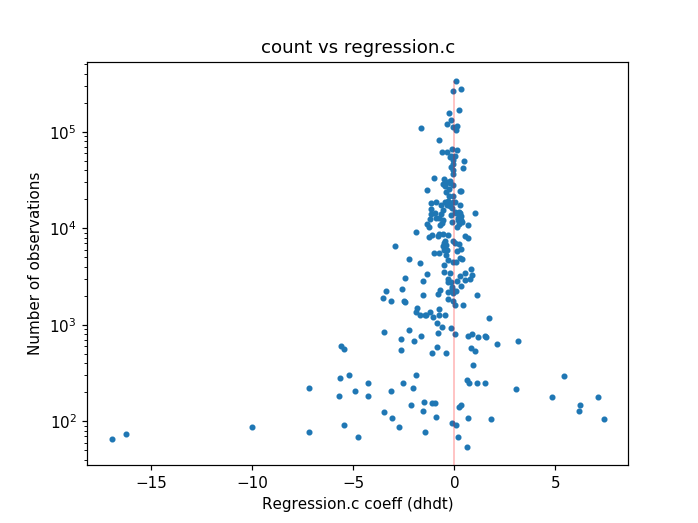

In [23]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
plt.plot([0,0],[0,ymax], '-r', linewidth=0.3)
plt.title('count vs regression.c')
plt.ylabel('Number of observations')
plt.xlabel('Regression.c coeff (dhdt)')
ax.set_yscale('log')
plt.show()